# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

![title](equatorsign.png)

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key
import citipy
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
#save lats & lngs
lats_Saved_list= []
long_Saved_list = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lats_Saved_list.append(lat_lng[0])
        long_Saved_list.append(lat_lng[1])
        

#create df
list_df = pd.DataFrame({"City":cities, "Lat":lats_Saved_list,"Long":long_Saved_list})
list_df.to_csv("ListofCities,csv")
list_df.head()

,City,Lat,Long
0,ust-nera,63.793287,142.072575
1,mataura,-42.700298,-155.278102
2,tarbes,43.739365,0.074489
3,rikitea,-81.597454,-132.164330
4,mount gambier,-43.000059,137.773295


In [3]:
# Print the city count to confirm sufficient count
len(list_df)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#define URL
url_base = "http://api.openweathermap.org/data/2.5/weather?"
units =  "metric"
api_key = weather_api_key

#query URL
query_url = f"{url_base}appid={api_key}&units{units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=


In [5]:
#make list to store parameters to request/store
L_city = []
L_lat = []
L_lng = []
L_cloudiness = []
L_country = []
L_date = []
L_humidity = []
L_tempMaX = []
wind_speed_list = []
index_counter = 0
set_counter = 1

#loop throgh "cities"
for index, city in enumerate(cities, start = 1):
    try:
        print(query_url+city)
        response = requests.get(query_url + city).json()
        L_city.append(response["name"])
        L_cloudiness.append(response["clouds"]["all"])
        L_country.append(response["sys"]["country"])
        L_date.append(response["dt"])
        L_humidity.append(response["main"]["humidity"])
        L_lat.append(response["coord"]["lat"])
        L_lng.append(response["coord"]["lon"])
        L_tempMaX.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
         # limit query time
        time.sleep(0.01)
            
        
    except(KeyError, IndexError):
        print("#####City not found#####")

print("Done!!")


http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=ust-nera
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=mataura
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=tarbes
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=pemangkat
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=georgetown
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=mys shmidta
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetri

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=camacha
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=tupiza
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=berlevag
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=atuona
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=muravlenko
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=grindavik
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=tuatapere
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=sharan
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=halalo
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=tsienyane
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=lebu
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=ongandjera
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=bilma
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=gat
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=kota bahru
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&uni

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=paamiut
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=cayenne
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=novoagansk
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=road town
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=nylstroom
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=santa cruz de rosales
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=04fd3

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=sinegorskiy
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=jining
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=fremont
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=kemijarvi
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=atar
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=muana
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=caravelas
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=yarmouth
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=petropavlovsk-kamchatskiy
http://

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=keti bandar
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=gaogou
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=nhulunbuy
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=salalah
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=kamenskoye
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=opuwo
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=luderitz
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=naze
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=namibe


http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=denpasar
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=lydenburg
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=port blair
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=gizo
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=narsaq
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=mlonggo
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=lerwick
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=parabel
http://api.openweatherm

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=bull savanna
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=togur
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=amol
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=padang
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=toliary
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=bloomington
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=khilok
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=baoying
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=bowen
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=okandja
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=cuiluan
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=gazanjyk
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=kovur
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=west fargo
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsmetric&q=kieta
http:/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [6]:
# Create a panda data frame using data retrieved
weather_byCity = pd.DataFrame({ 
                "City" : L_city,
                "Country" : L_country,
                "Lat" : L_lat,
                "Lng" : L_lng,    
                "Cloudiness" : L_cloudiness,                
                "Date" : L_date,
                "Humidity" : L_humidity,                
                "Max Temp" : L_tempMaX,
                "Wind Speed" : wind_speed_list
})
#export to csv
weather_byCity .to_csv('WeaterBycity.csv')

print(weather_byCity)

                         City Country      Lat       Lng  Cloudiness  \
0                    Ust-Nera      RU  64.5667  143.2000         100   
1                     Mataura      NZ -46.1927  168.8643          96   
2    Arrondissement de Tarbes      FR  43.2500    0.1667          90   
3                     Rikitea      PF -23.1203 -134.9692         100   
4               Mount Gambier      AU -37.8333  140.7667          75   
..                        ...     ...      ...       ...         ...   
558                      Poya      NC -21.3500  165.1500           0   
559                    Xingyi      CN  24.1877  102.8170          85   
560        Comodoro Rivadavia      AR -45.8667  -67.5000           0   
561                     Korla      CN  41.7597   86.1469          19   
562                   Plastun      RU  44.7561  136.2939          99   

           Date  Humidity  Max Temp  Wind Speed  
0    1619589051        89    274.29        1.07  
1    1619589051        87    285.93

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
checkAbove100= weather_byCity['Humidity'].describe(include='all')
checkAbove100

count    563.000000
mean      70.060391
std       22.263864
min        1.000000
25%       58.500000
50%       75.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

No cities above 100%

In [13]:
#make df with <=100% humidity
Lessthan100 = weather_byCity.loc[weather_byCity['Humidity']<=100]
len(Lessthan100)

563

In [17]:
#  Get the indices of cities that have humidity over 100%.
index100 = weather_byCity
bool_arr = index
output =np.where



Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Lessthan100

In [15]:
clean_city_data


,City,Country,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,Ust-Nera,RU,64.5667,143.2000,100,1619589051,89,274.29,1.07
1,Mataura,NZ,-46.1927,168.8643,96,1619589051,87,285.93,4.02
2,Arrondissement de Tarbes,FR,43.2500,0.1667,90,1619589051,93,283.15,1.54
3,Rikitea,PF,-23.1203,-134.9692,100,1619589052,73,298.14,5.03
4,Mount Gambier,AU,-37.8333,140.7667,75,1619589052,63,290.15,3.09
...,...,...,...,...,...,...,...,...,...
558,Poya,NC,-21.3500,165.1500,0,1619589236,61,296.14,4.66
559,Xingyi,CN,24.1877,102.8170,85,1619589236,43,298.18,3.39
560,Comodoro Rivadavia,AR,-45.8667,-67.5000,0,1619589236,51,287.15,4.63
561,Korla,CN,41.7597,86.1469,19,1619589235,18,296.39,7.53


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

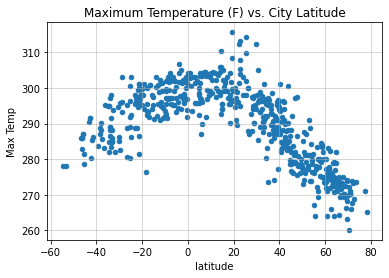

In [27]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp",  
                                      title="Maximum Temperature (F) vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("TempmaxVlatitude_All_Cities.png")

## Latitude vs. Humidity Plot

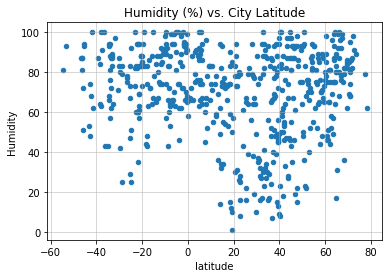

In [26]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Humidity",  
                                      title="Humidity (%) vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("HumidityVSLatitude_All_Cities.png")

## Latitude vs. Cloudiness Plot

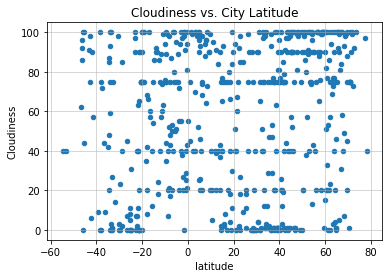

In [28]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness",  
                                      title="Cloudiness vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("CloudinessVSLatitude_All_Cities.png")

## Latitude vs. Wind Speed Plot

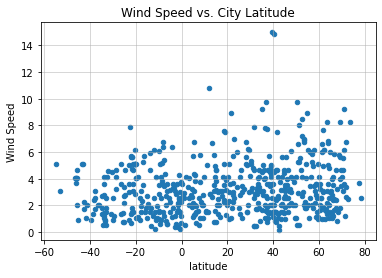

In [29]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed",  
                                      title="Wind Speed vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("windspeedVSLatitude_All_Cities.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [31]:
#northem hemisphere is define by lat >=0
#create df for northemhemisfere
North_df = clean_city_data.loc[(clean_city_data['Lat']>=0)]
North_df

,City,Country,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,Ust-Nera,RU,64.5667,143.2000,100,1619589051,89,274.29,1.07
2,Arrondissement de Tarbes,FR,43.2500,0.1667,90,1619589051,93,283.15,1.54
5,Pemangkat,ID,1.1667,108.9667,100,1619588767,72,300.71,2.96
6,George Town,MY,5.4112,100.3354,20,1619589053,74,304.15,3.09
7,Kandy,LK,7.2955,80.6356,88,1619589053,45,304.62,1.60
...,...,...,...,...,...,...,...,...,...
556,Partenit,UA,44.5780,34.3446,98,1619589235,46,286.48,4.41
557,Yabēlo,ET,4.8833,38.0833,25,1619589235,63,292.38,5.72
559,Xingyi,CN,24.1877,102.8170,85,1619589236,43,298.18,3.39
561,Korla,CN,41.7597,86.1469,19,1619589235,18,296.39,7.53


In [39]:
South_df = clean_city_data.loc[(clean_city_data['Lat']<0)]
South_df

,City,Country,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
1,Mataura,NZ,-46.1927,168.8643,96,1619589051,87,285.93,4.02
3,Rikitea,PF,-23.1203,-134.9692,100,1619589052,73,298.14,5.03
4,Mount Gambier,AU,-37.8333,140.7667,75,1619589052,63,290.15,3.09
8,Avarua,CK,-21.2078,-159.7750,20,1619589053,83,300.15,3.09
9,Hobart,AU,-42.8794,147.3294,75,1619589054,48,291.48,5.14
...,...,...,...,...,...,...,...,...,...
547,Bowen,AU,-20.0167,148.2333,90,1619589231,83,295.15,5.14
552,Kieta,PG,-6.2167,155.6333,80,1619589233,70,301.91,0.60
554,Benjamin Constant,BR,-4.3831,-70.0311,75,1619589234,100,296.15,1.11
558,Poya,NC,-21.3500,165.1500,0,1619589236,61,296.14,4.66


In [84]:
#create variables for axis
x_N=North_df['Lat']
y_N=North_df['Max Temp']

linear regression equation: y = -0.51x + 307.39
r^2= -0.8695587941967764


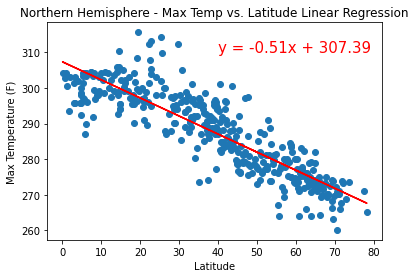

In [106]:
#create linear regresion funtion
x_val = pd.to_numeric(x_N).astype(float)
y_val = pd.to_numeric(y_N).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,310),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

 


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [92]:
#create variables for axis
x_S=South_df['Lat']
y_S=South_df['Max Temp']

linear regression equation: y = 0.34x + 301.11
r^2= 0.6939107818694524


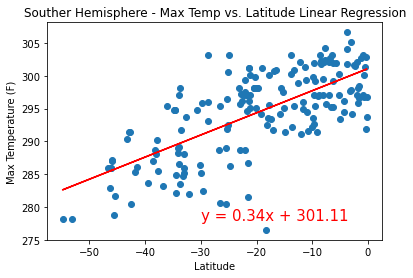

In [107]:
#create linear regresion funtion
x_val = pd.to_numeric(x_S).astype(float)
y_val = pd.to_numeric(y_S).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,278),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Souther Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [96]:
#create variables for axis
x_NH=North_df['Lat']
y_NH=North_df['Humidity']

linear regression equation: y = 0.18x + 59.5
r^2= 0.15271089740310007


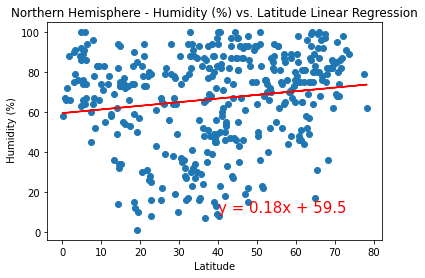

In [109]:
#create linear regresion funtion
x_val = pd.to_numeric(x_NH).astype(float)
y_val = pd.to_numeric(y_NH).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [98]:
#create variables for axis
x_SH=South_df['Lat']
y_SH=South_df['Humidity']

linear regression equation: y = 0.13x + 79.65
r^2= 0.10327161662750589


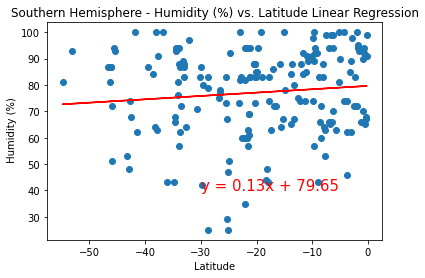

In [102]:
#create linear regresion funtion
x_val = pd.to_numeric(x_SH).astype(float)
y_val = pd.to_numeric(y_SH).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [100]:
#create variables for axis
x_NC=North_df['Lat']
y_NC=North_df['Cloudiness']

linear regression equation: y = 0.27x + 47.11
r^2= 0.14075675118004582


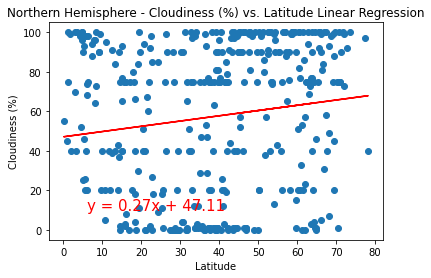

In [110]:
#create linear regresion funtion
x_val = pd.to_numeric(x_NC).astype(float)
y_val = pd.to_numeric(y_NC).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [112]:
#create variables for axis
x_SC=South_df['Lat']
y_SC=South_df['Cloudiness']

linear regression equation: y = 0.38x + 60.14
r^2= 0.14297018580297155


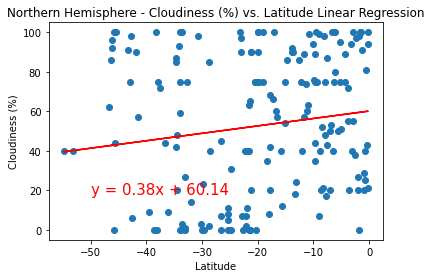

In [114]:
#create linear regresion funtion
x_val = pd.to_numeric(x_SC).astype(float)
y_val = pd.to_numeric(y_SC).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [116]:
#create variables for axis
x_NW=North_df['Lat']
y_NW=North_df['Wind Speed']

linear regression equation: y = 0.01x + 3.03
r^2= 0.10120591887047098


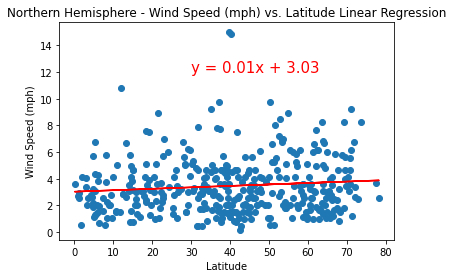

In [119]:
#create linear regresion funtion
x_val = pd.to_numeric(x_NW).astype(float)
y_val = pd.to_numeric(y_NW).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [120]:
#create variables for axis
x_SW=South_df['Lat']
y_SW=South_df['Wind Speed']

linear regression equation: y = -0.01x + 2.66
r^2= -0.05668384247666238


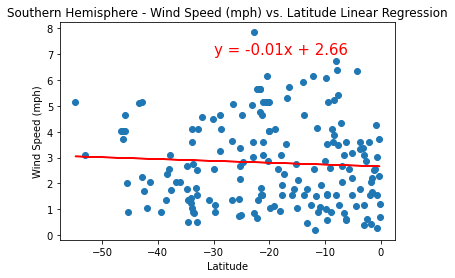

In [123]:
#create linear regresion funtion
x_val = pd.to_numeric(x_SW).astype(float)
y_val = pd.to_numeric(y_SW).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()